In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes     import GaussianNB
from sklearn.metrics         import accuracy_score
import matplotlib.pyplot as plt

In [14]:
# Carrega o dataset (supondo que ele esteja em um arquivo CSV)
df = pd.read_csv('data/all.csv')

# Se a última coluna é a variável alvo (0 ou 1), separe os dados:
parameters = df.iloc[:, :-1]  # Todas as colunas, exceto a última, como parametros
diagnosis = df.iloc[:, -1]   # Última coluna como alvo

# Lista para armazenar os resultados
results = []

sum = 0
n = 1000
for seed in range(n):
    # Divide os dados em conjunto de treino e teste (70% treino, 30% teste)
    parameters_train, parameters_test, diagnosis_train, diagnosis_test = train_test_split(parameters, diagnosis, test_size=0.3, random_state=seed)
    # parameters_train --> parametros para treino
    # parameters_test  --> parametros para aplicação do modelo
    # diagnosis_train --> diagnostico para treino
    # diagnosis_test  --> diagnostico alvo (esperado)

    # Cria o classificador Naive Bayes
    clf = GaussianNB()

    # Treina o modelo com os dados de treino
    clf.fit(parameters_train, diagnosis_train)

    # Faz previsões com os dados de teste
    diagnosis_pred = clf.predict(parameters_test)

    # Avalia a performance do modelo (exemplo: acurácia)
    accuracy = accuracy_score(diagnosis_test, diagnosis_pred)

    # Armazena os resultados em um DataFrame
    results.append((seed, accuracy))

    # print("Random state: ", seed)
    # print("Acurácia do modelo:", accuracy, end="\n-----------------\n")
    sum += accuracy
print("Média de acurácia: ", sum/n)

Média de acurácia:  0.7222000000000011


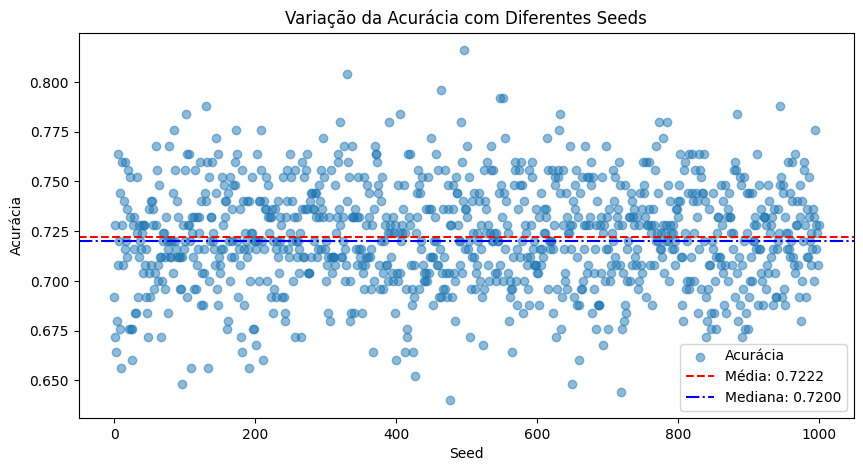

In [15]:
# Converte os resultados em um DataFrame
df_results = pd.DataFrame(results, columns=['Seed', 'Acurácia'])

# Calcula média e mediana
mean_accuracy = df_results['Acurácia'].mean()
median_accuracy = df_results['Acurácia'].median()

# Plota o gráfico
plt.figure(figsize=(10, 5))
plt.scatter(df_results['Seed'], df_results['Acurácia'], alpha=0.5, label='Acurácia')
plt.axhline(mean_accuracy, color='red', linestyle='--', label=f'Média: {mean_accuracy:.4f}')
plt.axhline(median_accuracy, color='blue', linestyle='-.', label=f'Mediana: {median_accuracy:.4f}')
plt.xlabel('Seed')
plt.ylabel('Acurácia')
plt.title('Variação da Acurácia com Diferentes Seeds')
plt.legend()
plt.show()